In [1]:
%cd ~/src/laboratori/1314

/home/jovyan/src/laboratori/1314


# **Introduzione al Machine Learning -- laboratorio 13 e 14**

- Stima ML di parametri di dimensione elevata

Obiettivo: fare fit di un modello parametrico per questo dataset

Importa `pandas` e legge il primo foglio ('sheet_name=0') del file Excel 'synthetic_sample_generation.xlsx' in un DataFrame `df`. Visualizza il DataFrame.

In [2]:
# Carico la prima scheda del file excel

import pandas as pd

filename = 'synthetic_sample_generation.xlsx'

df = pd.read_excel(filename, sheet_name=0)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,nu,1.334647,1.172535,1.248412,1.36543,1.06997,0.766827,0.338499,0.60849,1.625765,...,0.637977,0.474451,1.109622,1.172687,0.650288,0.66669,0.560875,0.89542,0.738677,0.708506
1,cluster,9.000000,8.000000,2.000000,5.00000,2.00000,3.000000,5.000000,10.00000,2.000000,...,2.000000,8.000000,9.000000,7.000000,1.000000,1.00000,2.000000,8.00000,5.000000,8.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0610007N19Rik,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000
4,0610007P14Rik,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,l7Rn6,0.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
12572,mmu-mir-7067,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
12573,mmu-mir-7666,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
12574,n-R5s115,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


Imposta la prima colonna del DataFrame `df` come indice delle righe e visualizza il DataFrame aggiornato.

In [3]:
df = df.set_index(df.columns[0])
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
nu,1.334647,1.172535,1.248412,1.36543,1.06997,0.766827,0.338499,0.60849,1.625765,1.226179,...,0.637977,0.474451,1.109622,1.172687,0.650288,0.66669,0.560875,0.89542,0.738677,0.708506
cluster,9.000000,8.000000,2.000000,5.00000,2.00000,3.000000,5.000000,10.00000,2.000000,3.000000,...,2.000000,8.000000,9.000000,7.000000,1.000000,1.00000,2.000000,8.00000,5.000000,8.000000
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610007N19Rik,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.00000,0.000000,0.000000
0610007P14Rik,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l7Rn6,0.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
mmu-mir-7067,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
mmu-mir-7666,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


Rimuove le prime tre righe del DataFrame `df` (che contengono metadati) usando `iloc` e memorizza i dati effettivi in `df_data`. Visualizza `df_data`.

In [4]:
# Butto via le prime 3 righe
df_data = df.iloc[3:, :]
df_data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0610007N19Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0610009B22Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009E02Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l7Rn6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmu-mir-7067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmu-mir-7666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Estrae i numeri di cluster dalla seconda riga (indice 1) del DataFrame originale `df` e li memorizza nell'array `clusters`. Visualizza l'array `clusters`.

In [5]:
# Mi tengo da parte i numeri di cluster leggendo la seconda riga del df originale
clusters = df.iloc[1, :].values
clusters

array([ 9.,  8.,  2.,  5.,  2.,  3.,  5., 10.,  2.,  3.,  8.,  1.,  2.,
        5.,  5.,  2.,  5.,  9.,  6.,  7.,  3.,  5.,  1.,  8.,  2.,  2.,
        2.,  6.,  7.,  6.,  4.,  8.,  8.,  1.,  8.,  7.,  4.,  7., 10.,
        3.,  5.,  1.,  6.,  8.,  5.,  4.,  1.,  6.,  9.,  3.,  6.,  7.,
        1.,  2.,  5.,  5.,  4.,  1.,  2., 10.,  8.,  5.,  5.,  4.,  5.,
        2.,  7.,  4.,  2.,  5.,  1.,  8.,  6.,  3.,  8.,  6.,  1.,  4.,
        5.,  5.,  3.,  2.,  7.,  8.,  6.,  2.,  1.,  6.,  6.,  2.,  7.,
        8.,  1.,  2.,  1.,  6.,  9.,  5.,  7.,  7.,  1.,  3.,  2.,  6.,
       10.,  4.,  3.,  6., 10.,  1.,  2.,  1.,  6.,  2.,  3.,  4.,  1.,
        5.,  7.,  4.,  1.,  9.,  8.,  7.,  5.,  3.,  4.,  2., 10.,  5.,
        2.,  6.,  8.,  7.,  5.,  6.,  8.,  7.,  5.,  3.,  6.,  6.,  9.,
        4.,  2.,  4.,  3.,  5.,  2.,  2.,  2.,  6.,  6.,  3.,  9.,  3.,
        8.,  2.,  4.,  2.,  5.,  3.,  4.,  3.,  2.,  5.,  1.,  3.,  3.,
        2.,  5.,  3.,  5.,  9.,  2.,  1.,  1.,  4.,  7.,  4.,  7

Importa la libreria `numpy`.

In [6]:
import numpy as np

Sostituisce i nomi delle colonne del DataFrame `df_data` con una sequenza di numeri interi da 0 a 999. Visualizza il DataFrame aggiornato.

In [7]:
# Sostituisco i nomi delle colonne con numeri da 0 a 999

df_data.columns = list(range(1000))
df_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0610007N19Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0610007P14Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
0610009B22Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009D07Rik,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0610009E02Rik,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l7Rn6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmu-mir-7067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mmu-mir-7666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ottiene il numero di geni (`ngenes`) e il numero di cellule (`ncell`) dalle dimensioni del DataFrame `df_data` e li stampa.

In [8]:
ngenes, ncell = df_data.shape
print(ngenes, ncell)

12573 1000


Inizializza i parametri per un modello di espressione genica basato sulla distribuzione binomiale negativa. `a` (dispersione) e `mu` (livello medio di espressione) dipendono dal gene, mentre `t` (fattore di scala/libreria) dipende dalla cellula. Vengono inizializzati come array di uni.

In [9]:
# Uso un modello in cui a dipende dal gene e nu=mu*t con mu dipendente dal gene e t dalla cellula

a  = np.ones(ngenes)
mu = np.ones(ngenes)
t  = np.ones(ncell)


Importa la distribuzione binomiale negativa (`nbinom`) da `scipy.stats`. Definisce la funzione `loss_rna(a, mu, t)` che calcola il negativo della log-verosimiglianza media per i dati di conteggio RNA-seq (`df_data`) sotto il modello binomiale negativo. I parametri `r` e `p` della distribuzione sono calcolati a partire da `a`, `mu` e `t`.

In [10]:
# Definisco la loss in funzione dei parametri, usando la binomiale negativa

from scipy.stats import nbinom

def loss_rna(a, mu, t):
  nu = mu.reshape(-1, 1) * t.reshape(1, -1)
  a = a.reshape(-1, 1)
  r = 1 / a
  p = 1 / (1 + a * nu)
  return -nbinom.logpmf(df_data, r, p).mean()

Calcola e visualizza il valore iniziale della funzione di loss `loss_rna` utilizzando i parametri inizializzati `a`, `mu`, `t`.

In [11]:
loss_rna(a, mu, t)

np.float64(0.7920329807904846)

Concatena i parametri `a`, `mu`, `t` in un unico array e ne visualizza la forma (dimensione totale del vettore dei parametri).

In [12]:
np.concatenate([a, mu, t]).shape

(26146,)

Importa `minimize` da `scipy.optimize`. Definisce una funzione `loss_wrapped` che prende un unico array di parametri, li separa in `a`, `mu`, `t` e calcola la loss. Commenta il tentativo di usare `minimize` (che probabilmente fallirebbe per l'alta dimensionalità).

In [13]:
# Proviamo a minimizzare la loss usando scipy: probabilmente non funzionerà perché la dimensione è troppo alta

from scipy.optimize import minimize

def loss_wrapped(params):
  a = params[:ngenes]
  mu = params[ngenes:ngenes+ngenes]
  t = params[ngenes+ngenes:]
  return loss_rna(a, mu, t)

# Non funziona
# res = minimize(loss_wrapped, x0=np.concatenate((a, mu, t)))
# print(res)

Importa `torch` e `NegativeBinomial` da `torch.distributions`. Inizializza i parametri `a`, `mu`, `t` come tensori PyTorch nello spazio logaritmico (`a_log`, `mu_log`, `t_log`), abilitando il calcolo dei gradienti. Definisce la funzione di loss `loss_rna_log` usando la parametrizzazione logaritmica e la `NegativeBinomial` di PyTorch, operando sui tensori e convertendo i dati in un tensore.

In [14]:
# Un modo più ragionevole puo' essere di usare una libreria per reti neurali

import torch
from torch.distributions import NegativeBinomial

a_log  = torch.zeros(ngenes,  dtype=torch.float32, requires_grad=True)
mu_log = torch.zeros(ngenes, dtype=torch.float32, requires_grad=True)
t_log  = torch.zeros(ncell,  dtype=torch.float32, requires_grad=True)

def loss_rna_log(log_a, log_mu, log_t, data=torch.tensor(df_data.values)):
    log_nu = log_mu.reshape(-1, 1) + log_t.reshape(1, -1)
    log_a = log_a.reshape(-1, 1)
    r = torch.exp(-log_a)
    # q = 1 - 1 / (1 + torch.exp(log_a + log_nu)) # 1 - logit(-log_a - log_nu) = logit(log_a + log_nu)
    logit_q = log_a + log_nu
    # return -nbinom.logpmf(df_data, r, p).mean()
    return -NegativeBinomial(r, logits=logit_q).log_prob(data).mean()

Calcola il valore iniziale della loss usando i tensori logaritmici. Esegue la retropropagazione (`loss.backward()`) per calcolare i gradienti rispetto ai parametri. Visualizza il valore della loss.

In [15]:
loss = loss_rna_log(a_log, mu_log, t_log)
loss.backward()

loss

tensor(0.7920, dtype=torch.float64, grad_fn=<NegBackward0>)

Visualizza il gradiente calcolato per il tensore `t_log`.

In [16]:
t_log.grad

tensor([3.9839e-04, 4.0937e-04, 4.1012e-04, 3.9943e-04, 4.2122e-04, 4.4393e-04,
        4.7562e-04, 4.5753e-04, 3.8050e-04, 4.1283e-04, 3.7075e-04, 4.4496e-04,
        3.9883e-04, 4.3013e-04, 4.5912e-04, 4.5570e-04, 4.4989e-04, 4.1199e-04,
        4.4262e-04, 4.5856e-04, 3.7919e-04, 4.1378e-04, 4.3581e-04, 4.5240e-04,
        4.4110e-04, 4.3100e-04, 4.7511e-04, 3.8098e-04, 3.9322e-04, 4.2858e-04,
        4.3975e-04, 4.5506e-04, 4.5196e-04, 4.5785e-04, 4.5435e-04, 4.6433e-04,
        4.1351e-04, 4.5069e-04, 4.2325e-04, 4.5880e-04, 4.3900e-04, 4.2734e-04,
        4.2945e-04, 4.4874e-04, 4.5602e-04, 3.5457e-04, 4.5645e-04, 3.9215e-04,
        3.8396e-04, 4.2369e-04, 4.5824e-04, 3.7787e-04, 3.9660e-04, 3.9979e-04,
        4.2011e-04, 4.5586e-04, 4.4623e-04, 4.3375e-04, 3.9235e-04, 3.6630e-04,
        4.3768e-04, 4.4214e-04, 4.1478e-04, 4.0738e-04, 4.5232e-04, 4.5522e-04,
        4.2595e-04, 4.3148e-04, 4.5240e-04, 4.3200e-04, 4.2937e-04, 4.3466e-04,
        4.5999e-04, 4.6242e-04, 4.6524e-

Inizializza un ottimizzatore Stochastic Gradient Descent (SGD) di PyTorch, passando i tensori dei parametri e un learning rate. Esegue un ciclo di ottimizzazione per un numero definito di epoche (`epochs`). In ogni epoca: azzera i gradienti, calcola la loss, stampa la loss, calcola i nuovi gradienti (`loss.backward()`) e aggiorna i parametri (`optimizer.step()`).

In [17]:
# Cercio il minimo usando l'algoritmo standard di gradient descent

optimizer = torch.optim.SGD([a_log, mu_log, t_log], lr=1) # stochastic gradient descent

# Si fa un ciclo di ottimizzazione
epochs = 20

for epoch in range(epochs):
    optimizer.zero_grad() # azzero i gradienti
    loss = loss_rna_log(a_log, mu_log, t_log)

    print(f"Epoch {epoch}, Loss: {loss.item()}")

    loss.backward() # calcolo i gradienti
    optimizer.step() # faccio un passo di ottimizzazione

Epoch 0, Loss: 0.7920329829668606
Epoch 1, Loss: 0.791826234612929
Epoch 2, Loss: 0.7916196135870643
Epoch 3, Loss: 0.7914131176281124
Epoch 4, Loss: 0.7912067512270394
Epoch 5, Loss: 0.7910005097687981
Epoch 6, Loss: 0.7907944031314103
Epoch 7, Loss: 0.790588418164685
Epoch 8, Loss: 0.7903825608914139
Epoch 9, Loss: 0.7901768276958605
Epoch 10, Loss: 0.7899712270093686
Epoch 11, Loss: 0.7897657519366962
Epoch 12, Loss: 0.7895604048591638
Epoch 13, Loss: 0.7893551804705665
Epoch 14, Loss: 0.7891500837423732
Epoch 15, Loss: 0.7889451165780673
Epoch 16, Loss: 0.7887402709650659
Epoch 17, Loss: 0.7885355540609117
Epoch 18, Loss: 0.7883309647881059
Epoch 19, Loss: 0.7881264993277182


Inizializza un ottimizzatore Adam di PyTorch. Esegue un ciclo di ottimizzazione simile al precedente, ma utilizzando l'algoritmo Adam per aggiornare i parametri.

In [18]:
# Cercio il minimo usando l'algoritmo standard di Adam

optimizer = torch.optim.Adam([a_log, mu_log, t_log], lr=1) # Adam

# Si fa un ciclo di ottimizzazione
epochs = 20

for epoch in range(epochs):
    optimizer.zero_grad() # azzero i gradienti
    loss = loss_rna_log(a_log, mu_log, t_log)

    print(f"Epoch {epoch}, Loss: {loss.item()}")

    loss.backward() # calcolo i gradienti
    optimizer.step() # faccio un passo di ottimizzazione

Epoch 0, Loss: 0.7879221615552762
Epoch 1, Loss: 0.36021111892405994
Epoch 2, Loss: 0.3442853871097376
Epoch 3, Loss: 0.35804376672675076
Epoch 4, Loss: 0.3663236486448166
Epoch 5, Loss: 0.36744881464253987
Epoch 6, Loss: 0.36450025153253784
Epoch 7, Loss: 0.36049869044729776
Epoch 8, Loss: 0.3582365004413091
Epoch 9, Loss: 0.3574767547664044
Epoch 10, Loss: 0.35486987016023025
Epoch 11, Loss: 0.34976339012792945
Epoch 12, Loss: 0.3436842101765724
Epoch 13, Loss: 0.3378343382867925
Epoch 14, Loss: 0.3326404370331311
Epoch 15, Loss: 0.3280744233214686
Epoch 16, Loss: 0.3239466504821117
Epoch 17, Loss: 0.32007663125403485
Epoch 18, Loss: 0.31635497184487593
Epoch 19, Loss: 0.31278526746061497


Passiamo alla regressione

Legge il file Excel 'body.xlsx' in un DataFrame `df`, imposta la prima colonna come indice e visualizza il DataFrame.

In [19]:
filename = 'body.xlsx'

df = pd.read_excel(filename)
df = df.set_index(df.columns[0])
df

,Biacromial diameter (see Fig. 2),"Biiliac diameter, or ""pelvic breadth"" (see Fig. 2)",Bitrochanteric diameter (see Fig. 2),"Chest depth between spine and sternum at nipple level,","Chest diameter at nipple level, mid-expiration","Elbow diameter, sum of two elbows","Wrist diameter, sum of two wrists","Knee diameter, sum of two knees","Ankle diameter, sum of two ankles",Shoulder girth over deltoid muscles,...,"Bicep girth, flexed, average of right and left girths","Forearm girth, extended, palm up, average of right and","Knee girth over patella, slightly flexed position, average","Calf maximum girth, average of right and left girths","Ankle minimum girth, average of right and left girths","Wrist minimum girth, average of right and left girths",Age (years),Weight (kg),Height (cm),"Gender (1 - male, 0 - female)"
Id,,,,,,,,,,,,,,,,,,,,,
1,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
2,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
3,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
4,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
5,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29,71.8,176.5,0
504,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21,55.5,164.4,0
505,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33,48.6,160.7,0


Importa `matplotlib.pyplot`. Seleziona le colonne 'Height (cm)' (come variabile indipendente `x`) e 'Weight (kg)' (come variabile dipendente `Y`) dal DataFrame. Crea uno scatter plot di `Y` contro `x`.

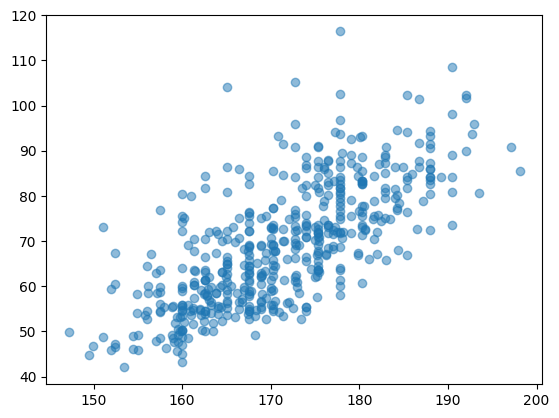

In [20]:
import matplotlib.pyplot as plt

# Scelgo le variabili per la regressione lineare semplice

x = df['Height (cm)'].values
Y = df['Weight (kg)'].values

plt.scatter(x, Y, alpha=0.5)
plt.show()

Calcola manualmente i coefficienti della regressione lineare semplice (intercetta `B0` e pendenza `B1`) utilizzando le formule basate sulle medie e medie dei prodotti/quadrati. Stampa i coefficienti calcolati.

In [21]:
# Implemento a mano le formule

xY_bar = np.mean(x * Y)
x_bar = np.mean(x)
Y_bar = np.mean(Y)
x2_bar = np.mean(x**2)

B1 = (xY_bar - x_bar * Y_bar) / (x2_bar - x_bar**2)
B0 = Y_bar - B1 * x_bar

print(B0, B1)

-105.01125416814054 1.0176167756704484


Calcola i limiti per l'asse x del grafico. Crea nuovamente lo scatter plot dei dati e sovrappone la retta di regressione calcolata manualmente (usando `B0` e `B1`).

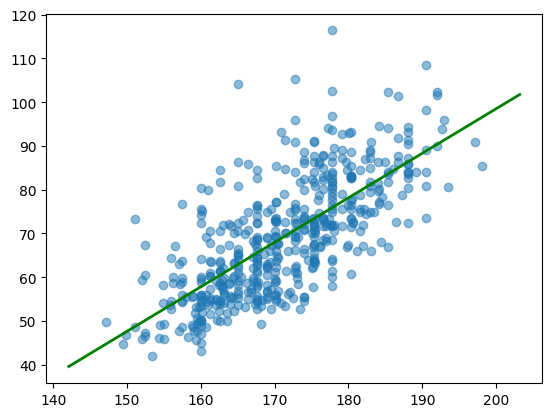

In [22]:
x_min = np.min(x)
x_max = np.max(x)

x_range = x_max - x_min
extend = 0.1
x_lim_min = x_min - extend * x_range
x_lim_max = x_max + extend * x_range

plt.scatter(x, Y, alpha=0.5)
plt.plot([x_lim_min, x_lim_max], [B0 + B1 * x_lim_min, B0 + B1 * x_lim_max], color='green', lw=2)
plt.show()

Importa `LinearRegression` da `sklearn.linear_model`. Crea un modello di regressione lineare, lo addestra (`fit`) sui dati `x` (rimodellato come matrice a colonna singola) e `Y`. Stampa l'intercetta e il coefficiente ottenuti da scikit-learn.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), Y)

print(model.intercept_, model.coef_)

-105.01125416814267 [1.01761678]


Importa `linregress` da `scipy.stats`. Esegue la regressione lineare usando `linregress` e stampa l'intercetta e la pendenza ottenute.

In [24]:
from scipy.stats import linregress

model1 = linregress(x, Y)

print(model1.intercept, model1.slope)

-105.01125416814301 1.0176167756704628


Calcola manualmente i residui della regressione, la somma dei quadrati dei residui (SSR) e lo stimatore della deviazione standard dei residui (`Se`). Stampa SSR e Se.

In [25]:
# Calcolo a mano SSR e lo stimatore sigma

Y_predicted = B0 + B1 * x
residuals = Y - Y_predicted

SSR = np.sum(residuals**2)
Se = np.sqrt(SSR / (len(x) - 2)) # Deviazione standard della retta

print(SSR)
print(Se)

43753.005766319315
9.308040361904869


In [26]:
# Posso farmi dare SSR e Se anche dai modelli fittati sopra? NO devo sempre farli a mano

Importa la distribuzione t da `scipy.stats`. Esegue manualmente il test t per la significatività del coefficiente di pendenza `B1`. Calcola la statistica T e il p-value corrispondente. Stampa T e il p-value.

In [27]:
from scipy.stats import t

# Proviamo a fare il test di regressione

n = len(x)

# Statistica del test
T = B1 / Se * np.sqrt(n * (x2_bar - x_bar**2))
p_value = 2 * (t.sf(np.abs(T), df=n-2))

print(f'{T=:g}')
print(f'{p_value=:g}')

T=23.1346
p_value=2.8291e-81


Visualizza il p-value calcolato dalla funzione `linregress` (`model1.pvalue`) per confronto con il calcolo manuale.

In [28]:
model1.pvalue

np.float64(2.829100315149181e-81)